#  Que necesitas para aprender pytorch?

#### -POO
#### -Numpy
#### -Matploylib
#### -Fundamentos de deep learning
#### -Hugging face

##### Python 3.10.12

# Hola mundo en Pytorch;

In [39]:
import torch.nn as nn

class TextClassifier(nn.Module):

    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim):
        super().__init__()

        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.rnn = nn.LSTM(embedding_dim, hidden_dim, num_layers =2, batch_first=True)#capa 1
        self.fc = nn.Linear(hidden_dim, output_dim)#capa 2
    
    def forward(self, text):
        embedded = self.embedding(text)
        output, (hidden, cell) = self.rnn(embedded)
        final_hidden = hidden[-1]
        
        return self.fc(final_hidden)

In [40]:
vocab_size = 1000
embedding_dim = 100
hidden_dim = 256
output_dim = 2

model = TextClassifier(vocab_size, embedding_dim, hidden_dim, output_dim)
model

TextClassifier(
  (embedding): Embedding(1000, 100)
  (rnn): LSTM(100, 256, num_layers=2, batch_first=True)
  (fc): Linear(in_features=256, out_features=2, bias=True)
)

# Tensores

In [41]:
import torch
print(torch.__version__)

2.1.0+cu121


In [42]:
escalar = torch.randn(1)
vector = torch.zeros(1, 10)
matriz = torch.ones(2, 2)
print("Escalar;", escalar, "\n", "Vector;", vector, "\n", "Matriz;", matriz)

t5 = torch.randn(5, 2, 3)
t5

Escalar; tensor([0.3797]) 
 Vector; tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]) 
 Matriz; tensor([[1., 1.],
        [1., 1.]])


tensor([[[-1.5949, -0.1845,  1.4115],
         [-0.3950, -0.6951, -0.0943]],

        [[ 1.7625, -1.0622,  1.3447],
         [ 1.1745,  0.7960,  1.7453]],

        [[ 0.4835,  0.3862, -0.7559],
         [ 1.0678,  0.6478,  0.5646]],

        [[ 0.6735,  2.0808,  1.1812],
         [-0.6032, -0.0584,  1.6103]],

        [[ 1.3259,  1.9450,  0.8283],
         [-1.0766, -0.5834,  2.4754]]])

In [43]:
torch.tensor([[2,2],[3,3]])

tensor([[2, 2],
        [3, 3]])

#### En un tensor las filas son las variables, las columnas son las series de tiempo, y la "profundidad" los registros

# Debuggear y operar con tensores

#### Shape es para conocer su estructura

In [44]:
print(f"La shape de la matriz es {matriz.shape}")
print(f"La shape del tensor  es {t5.shape}")

La shape de la matriz es torch.Size([2, 2])
La shape del tensor  es torch.Size([5, 2, 3])


#### ndim es para conocer sus dimensiones

In [45]:
print(f"La ndim de la matriz es {matriz.ndim}")
print(f"La ndim del tensor  es {t5.ndim}")

La ndim de la matriz es 2
La ndim del tensor  es 3


In [46]:
matriz_float32 = torch.tensor([[3.1, 3.2], [3.3, 3.4]])
matriz_uint64 = torch.tensor([[3, 3], [3, 3]])

#matriz_float32.dtype, matriz_uint64.dtype

matriz_uint64 + matriz_float32

tensor([[6.1000, 6.2000],
        [6.3000, 6.4000]])

In [47]:
matriz_uint64.device

device(type='cpu')

In [48]:
torch.cuda.is_available()

False

In [49]:
import numpy as np

vector = np.ones(5)
torch.from_numpy(vector)

tensor([1., 1., 1., 1., 1.], dtype=torch.float64)

In [50]:
zeros_tensor = torch.zeros((3,4))

ones_tensor = torch.ones((3,4))

random_tensor = torch.randn((4))

In [51]:
added_tensor = zeros_tensor + ones_tensor

subtracted_tensor = zeros_tensor - ones_tensor

multiplied_tensor = zeros_tensor * ones_tensor

divided_tensor = random_tensor / ones_tensor

In [52]:
matrix1 = torch.randn(2, 3)
matrix2 = torch.randn(3, 2)

torch.matmul(matrix1, matrix2)

tensor([[ 0.5872,  0.2992],
        [-1.2017,  0.0593]])

# Generacion de datos

In [53]:
import matplotlib.pyplot as plt

In [54]:
# Parametros

volumen = 0.8
sesgo = 0.2

# Crear datos

inicio = 0
final = 1
step = 0.025
X = torch.arange(inicio, final, step).unsqueeze(dim=1)
print(f"Shape de X: {X.shape}")
Y = volumen*X + sesgo
print(f"Shape de y: {Y.shape}")

X[:10],Y[:10]

Shape de X: torch.Size([40, 1])
Shape de y: torch.Size([40, 1])


(tensor([[0.0000],
         [0.0250],
         [0.0500],
         [0.0750],
         [0.1000],
         [0.1250],
         [0.1500],
         [0.1750],
         [0.2000],
         [0.2250]]),
 tensor([[0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800]]))

### - Conjunto de entrenamiento: donde el modelo aprende
### - Conjunto de prueba: donde el modelo es evaluado

In [55]:
# Crear la division

train_division = int(0.7 * len(X))
X_ent, Y_ent = X[:train_division], Y[:train_division]

X_prueba, Y_prueba = X[train_division:], Y[train_division:]

In [56]:
def plot_predictions(datos_ent=X_ent,
                     etiq_ent=Y_ent,
                     datos_prueba=X_prueba,
                     etiq_prueba=Y_prueba,
                     predictions=None):
    """
    Traza datos de entrenamiento, datos de prueba y compara predicciones
    """
    plt.figure(figsize=(10, 10))

    # Traza datos de entrenamiento en verde
    plt.scatter(datos_ent, etiq_ent, c="g", s=6,
                label="Datos de entrenamineto")

    # Traza datos de prueba en amarillo
    plt.scatter(datos_prueba, etiq_prueba, c="y", s=6, label="Datos de prueba")

    if predictions is not None:
        # Traza las predicciones en rojo
        plt.scatter(datos_prueba, predictions,
                    c="r", s=6, label="Predicciones")

    # Leyenda
    plt.legend(prop={"size": 12});

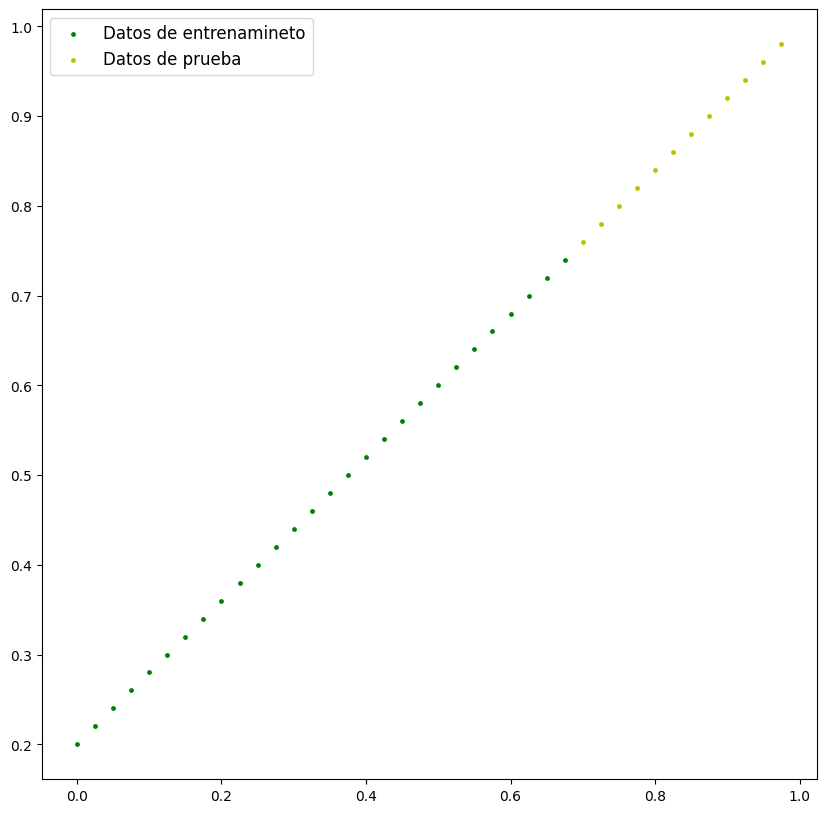

In [57]:
plot_predictions();

In [58]:
# Clase 8 de platzi
# Crear una clase de modelos de regresion lineal
class ModeloRegresionLineal(nn.Module):
    def __init__(self):
        super().__init__()
        self.volumen = nn.Parameter(torch.randn(
            1, dtype=torch.float), requires_grad=True)
        self.sesgo = nn.Parameter(torch.randn(
            1, dtype=torch.float), requires_grad=True)

# Definir el calculo

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.volumen*x + self.sesgo

In [59]:
torch.manual_seed(42)
# instanciar un objeto de la clase recien

model_1 = ModeloRegresionLineal()

In [60]:
model_1.state_dict()

OrderedDict([('volumen', tensor([0.3367])), ('sesgo', tensor([0.1288]))])

### Uso de torch.inference_mode()

In [61]:
# Hacer predicciones del modelo

with torch.inference_mode():
    Y_predc = model_1(X_prueba)

Y_predc

tensor([[0.3645],
        [0.3729],
        [0.3813],
        [0.3897],
        [0.3982],
        [0.4066],
        [0.4150],
        [0.4234],
        [0.4318],
        [0.4402],
        [0.4487],
        [0.4571]])

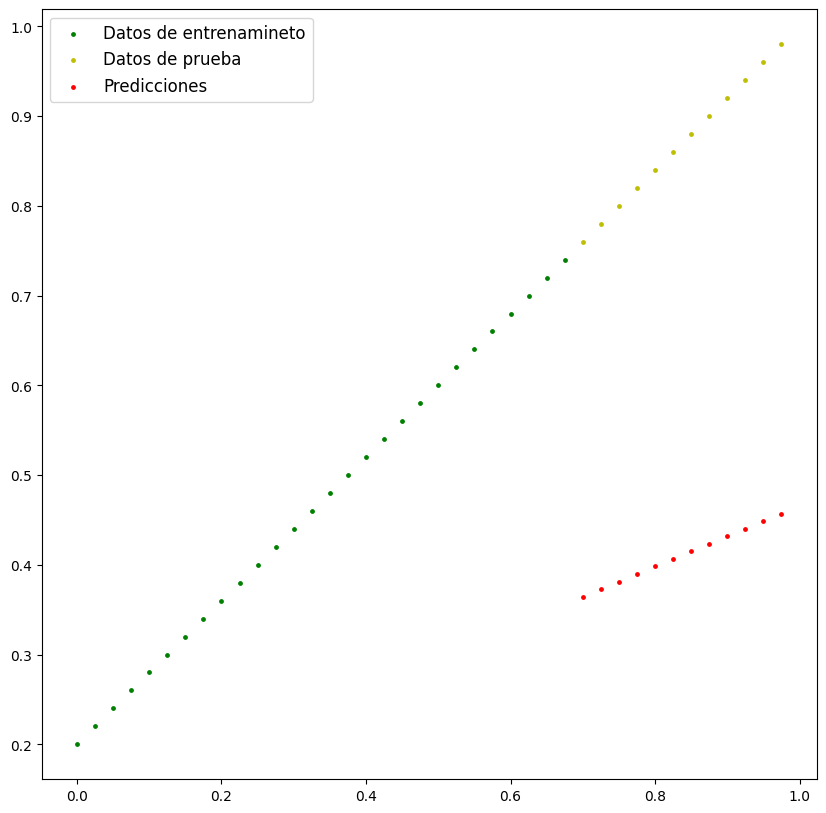

In [62]:
plot_predictions(predictions=Y_predc)

#### Funcion de perdida

In [63]:
## Funcion de perdida
fn_perd = torch.nn.L1Loss()

## optimizador

optimizador = torch.optim.SGD(params=model_1.parameters(), lr= 0.01) 
optimizador

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.01
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

In [64]:
## Definir el numero de epocas

epocas = 300

## Lista vacia para registrar la evolucion del modelo

entrenamineto_loss = []
test_loss = []

for epoca in range(epocas):
    ##Entrenamineto

    model_1.train() ##Modo de entrenamineto

    # 1. Avanzar los datos
    Y_predc = model_1(X_ent)

    # 2. Calcular perdida
    perdida = fn_perd(Y_predc, Y_ent)

    # 3. Gradiente cero del optimizador "iniciar el optimizador limpio"
    optimizador.zero_grad()

    # 4. Devolver la perdida
    perdida.backward()

    # 5. Progresar el optimizador
    optimizador.step()

    ## Fincion de prueba

    model_1.eval() # Modo de evaluacion

    with torch.inference_mode():

        # 1. Reenviar datos de prueba
        prueba_predc = model_1(X_prueba)

        # 2. Calcular la perdida
        prueba_perd = fn_perd(prueba_predc, Y_prueba.type(torch.float))

        #Imprimir lo que pasa

        if epoca % 10 == 0:
            entrenamineto_loss.append(perdida.detach().numpy())
            test_loss.append(prueba_perd.detach().numpy())
            print(f"Epoca; {epoca} | Entrenamineto perdida; {perdida} | Test perdida; {prueba_perd}")

Epoca; 0 | Entrenamineto perdida; 0.22755758464336395 | Test perdida; 0.44638586044311523
Epoca; 10 | Entrenamineto perdida; 0.1217288002371788 | Test perdida; 0.32246577739715576
Epoca; 20 | Entrenamineto perdida; 0.07873930037021637 | Test perdida; 0.24351508915424347
Epoca; 30 | Entrenamineto perdida; 0.06662709265947342 | Test perdida; 0.20124231278896332
Epoca; 40 | Entrenamineto perdida; 0.06196669116616249 | Test perdida; 0.1784226894378662
Epoca; 50 | Entrenamineto perdida; 0.05890420451760292 | Test perdida; 0.1637665033340454
Epoca; 60 | Entrenamineto perdida; 0.056116510182619095 | Test perdida; 0.15557575225830078
Epoca; 70 | Entrenamineto perdida; 0.053391676396131516 | Test perdida; 0.14738501608371735
Epoca; 80 | Entrenamineto perdida; 0.05066370964050293 | Test perdida; 0.14011786878108978
Epoca; 90 | Entrenamineto perdida; 0.047930534929037094 | Test perdida; 0.1328507363796234
Epoca; 100 | Entrenamineto perdida; 0.04521039500832558 | Test perdida; 0.124659962952137
Ep

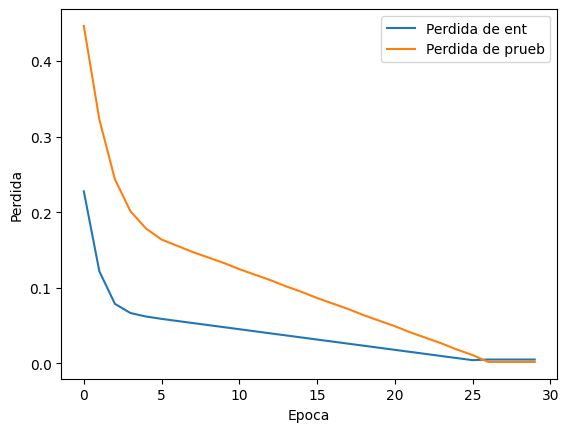

In [65]:
# Graficar

plt.plot(entrenamineto_loss, label="Perdida de ent")
plt.plot(test_loss, label="Perdida de prueb")
plt.ylabel("Perdida")
plt.xlabel("Epoca")
plt.legend()

#### Inferencia con un modelo entrenado

In [66]:
# 1. Configura el modelo en modo de evaluacion
model_1.eval()

# 2. Configura el administrados de contexto del modo de inferencia
with torch.inference_mode():

# 3. Asegurar que los calculos se hagan en el mismo dispositivo
    #model_1.to(device)
    #X_prueba = X_prueba.to(device)

    Y_predc = model_1(X_prueba)

Y_predc


tensor([[0.7507],
        [0.7704],
        [0.7901],
        [0.8098],
        [0.8295],
        [0.8493],
        [0.8690],
        [0.8887],
        [0.9084],
        [0.9281],
        [0.9478],
        [0.9675]])

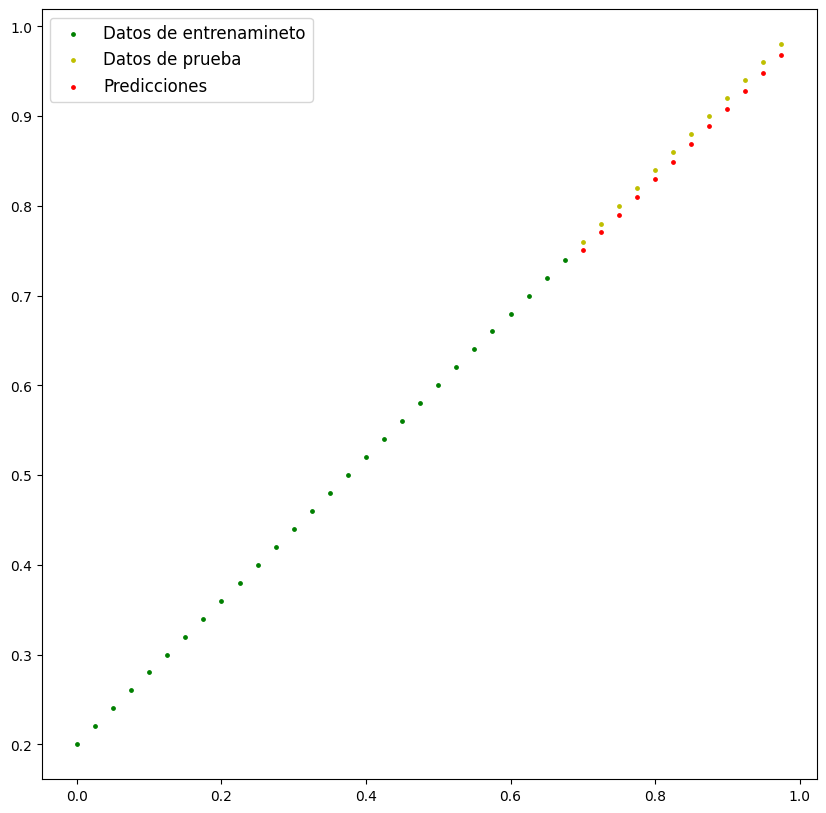

In [67]:
plot_predictions(predictions=Y_predc)
#Clase 11/24

En la clase 12 de pytorch hay documentacion relacionada a TensorDataSet con csv

# Clasificacion de datos con TorchText

In [68]:
import torchtext
from torchtext.datasets import DBpedia

torchtext.__version__

'0.16.0+cpu'

# Procesando un dataset y creando un vocabulario

In [69]:
train_iter = iter(DBpedia(split="train"))
next(train_iter)

(1,
 'E. D. Abbott Ltd  Abbott of Farnham E D Abbott Limited was a British coachbuilding business based in Farnham Surrey trading under that name from 1929. A major part of their output was under sub-contract to motor vehicle manufacturers. Their business closed in 1972.')

###### Tokenizacion

In [ ]:
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator

tokenizador = get_tokenizer("basic_english")
train_iter = DBpedia(split="train")